# Probability-insighter
https://github.com/alvason/probability-insighter

### Multinomial random distribution

In [1]:
'''
author: Alvason Zhenhua Li
date:   03/19/2015
'''
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import os

import alva_machinery_probability as alva

AlvaFontSize = 23
AlvaFigSize = (16, 6)
numberingFig = 0
# for saving figure
saving_dir_path = '/Users/al/Desktop/GitHub/probability-insighter/figure'
file_name = 'multinomial-distribution'
AlvaColorCycle = ['blue', 'green', 'cyan'
                  , 'pink', 'purple', 'deepskyblue'
                  , 'red', 'lime']
###############
import datetime
previous_running_time = datetime.datetime.now()
print ('Previous running time is {:}').format(previous_running_time)

Previous running time is 2016-06-09 15:49:33.900992
Previous running time is 2016-06-09 15:49:33.901383


### Probability of only one member with a unique face (k = 1 from m-dice of b-face)
### $ Pr(k = 1 | b, m) = m (b - 1)^{(m - k)} $

### Probability of only two members with a unique face (k = 2 from m-dice of b-face)
### $ Pr(k = 2 | b, m) = \frac{m!}{k!(m - k)!} (b - 1)^{(m - k)} $

In [2]:
# 1'23456'---1 work_way
# 1'23456'---1 work_way 
# '1'23456---5 work_way
# '1'23456---5 work_way
# '1'23456---5 work_way

In [7]:
class multinomial_D(object):
    def __init__(cell, base = None, digit = None
                 , wanted_event = None, total_wanted = None
                 , total_sampling = None, **kwargs):
        if base is None:
            base = 6
        cell.base = base
        if digit is None:
            digit = 10
        cell.digit = digit
        if wanted_event is None:
            wanted_event = 0
        cell.wanted_event = wanted_event
        if total_wanted is None:
            total_wanted = 1
        cell.total_wanted = total_wanted
        if total_sampling is None:
            total_sampling = 10**4
        cell.total_sampling = total_sampling
        # initialzing the possible_way_all
        cell.possible_way_all = cell.possible_way()
        # initialzing the work_way for randomSeed
        cell.work_way_all_all = cell.sampling_pmf()
    
    # distribution of probability_mass_function
    def sampling_pmf(cell, digitX = None):
        if digitX is None:
            digitX = np.arange(cell.digit + 1)
        digitX = np.asarray(digitX)
        # a integering-data step
        digitX = np.int64(digitX)
        # filter out negative and zero data
        digitX = digitX[digitX >= 0]
        watching = alva.TimeWatch()
        probability = np.zeros([len(digitX)])
        work_way_all_all = []
        for xn in range(len(digitX)):
            cell.total_wanted = digitX[xn]
            possible_way_all = cell.possible_way()
            work_way_all = cell.work_way()
            work_way_all_all.append(possible_way_all.loc[work_way_all.index])
            total_possible_way = len(possible_way_all)
            total_work_way = len(work_way_all)
            probability[xn] = float(total_work_way) / total_possible_way  
            watching.progressBar(1, xn + 1, len(digitX))
        cell.work_way_all_all = work_way_all_all
        return (digitX, probability, work_way_all_all)
        
    def possible_way(cell, base = None, digit = None, total_sampling = None):
        if base is None:
            base = cell.base
        if digit is None:
            digit = cell.digit
        if total_sampling is None:
            total_sampling = cell.total_sampling
        ###
        sampling_way_all = np.zeros([total_sampling, digit])
        for sn in range(total_sampling):
            sampling_way = np.zeros([digit])
            for dn in range(digit):
                sampling_way[dn] = int(base * np.random.random())
            sampling_way_all[sn] = sampling_way
        way_all = pd.DataFrame(sampling_way_all, columns = ['event_unit_' + str(i) for i in np.arange(digit)])
        possible_way_all = way_all.drop_duplicates()
        cell.possible_way_all = possible_way_all
        return (cell.possible_way_all)

    def work_way(cell, possible_way_all = None, wanted_event = None, total_wanted = None):
        if possible_way_all is None:
            possible_way_all = cell.possible_way_all
        if wanted_event is None:
            wanted_event = cell.wanted_event
        if total_wanted is None:
            total_wanted = cell.total_wanted
        # like_way is a way with at least one-wanted 
        like_way_all = possible_way_all[possible_way_all == wanted_event]
        work_way_all = like_way_all[like_way_all.isnull().sum(axis = 1) == (cell.digit - total_wanted)]
        cell.work_way_all = work_way_all
        return (cell.work_way_all)
    
    # distribution of probability_mass_function
    def reality_pmf(cell, digitX = None):
        if digitX is None:
            digitX = np.arange(cell.digit + 1)
        digitX = np.asarray(digitX)
        # a integering-data step
        digitX = np.int64(digitX)
        # filter out negative and zero data
        digitX = digitX[digitX >= 0]
        probability = np.zeros([len(digitX)])
        for xn in range(len(digitX)):
            cell.total_wanted = digitX[xn]
            probability[xn] = cell.base_digit_reality()
        return (digitX, probability)
    
    def base_digit_reality(cell, base = None, digit = None, total_wanted = None):
        if base is None:
            base = cell.base
        if digit is None:
            digit = cell.digit
        if total_wanted is None:
            total_wanted = cell.total_wanted
        base = float(base)
        digit = float(digit)
        k = float(total_wanted)
        total_possible_way = base**digit
        binomial_coefficient = float(alva.productA(digit)) / (alva.productA(k) * alva.productA(digit - k)) 
        total_work_way = binomial_coefficient * (base - 1)**(digit - k)
        probability = total_work_way / total_possible_way
        return (probability)

    def randomSeed_multinomial(cell, work_way_all_all = None):
        if work_way_all_all is None:
            work_way_all_all = cell.work_way_all_all
        total_level = len(work_way_all_all)
        output_range = total_level
        total_work_way = np.zeros([total_level])
        leveleee_all = []
        for i in range(total_level):
            total_work_way[i] = work_way_all_all[i].shape[0]
            leveleee = (output_range * float(i + 1) / total_level) * np.ones([total_work_way[i]]) 
            leveleee_all.append(leveleee)
        # randomly picking up work_way
        output_work_way = np.concatenate(leveleee_all)
        randomSeed = np.zeros([len(output_work_way)])
        index_record = np.array([0])
        for i in range(len(output_work_way)):
            random_index = int(len(output_work_way) * np.random.random())
            while (index_record.any() == random_index): 
                random_index = int(len(output_work_way) * np.random.random())
            randomSeed[i] = output_work_way[random_index]
            index_record = np.append(index_record, random_index) 
        return (randomSeed)  
############################# 
#if __name__ == '__main__':
aMD = multinomial_D(base = 2, digit = 8, total_sampling = 1000)
ppp = aMD.possible_way()
www = aMD.work_way(total_wanted = 7)
ppp.loc[www.index]

[0.100985 second -------------------- 100% ]


,event_unit_0,event_unit_1,event_unit_2,event_unit_3,event_unit_4,event_unit_5,event_unit_6,event_unit_7
10,0,0,0,0,0,1,0,0
105,0,0,1,0,0,0,0,0
148,0,0,0,1,0,0,0,0
162,0,0,0,0,1,0,0,0
225,0,1,0,0,0,0,0,0
357,1,0,0,0,0,0,0,0
375,0,0,0,0,0,0,1,0
926,0,0,0,0,0,0,0,1


[2.666252 second -------------------- 100% ]


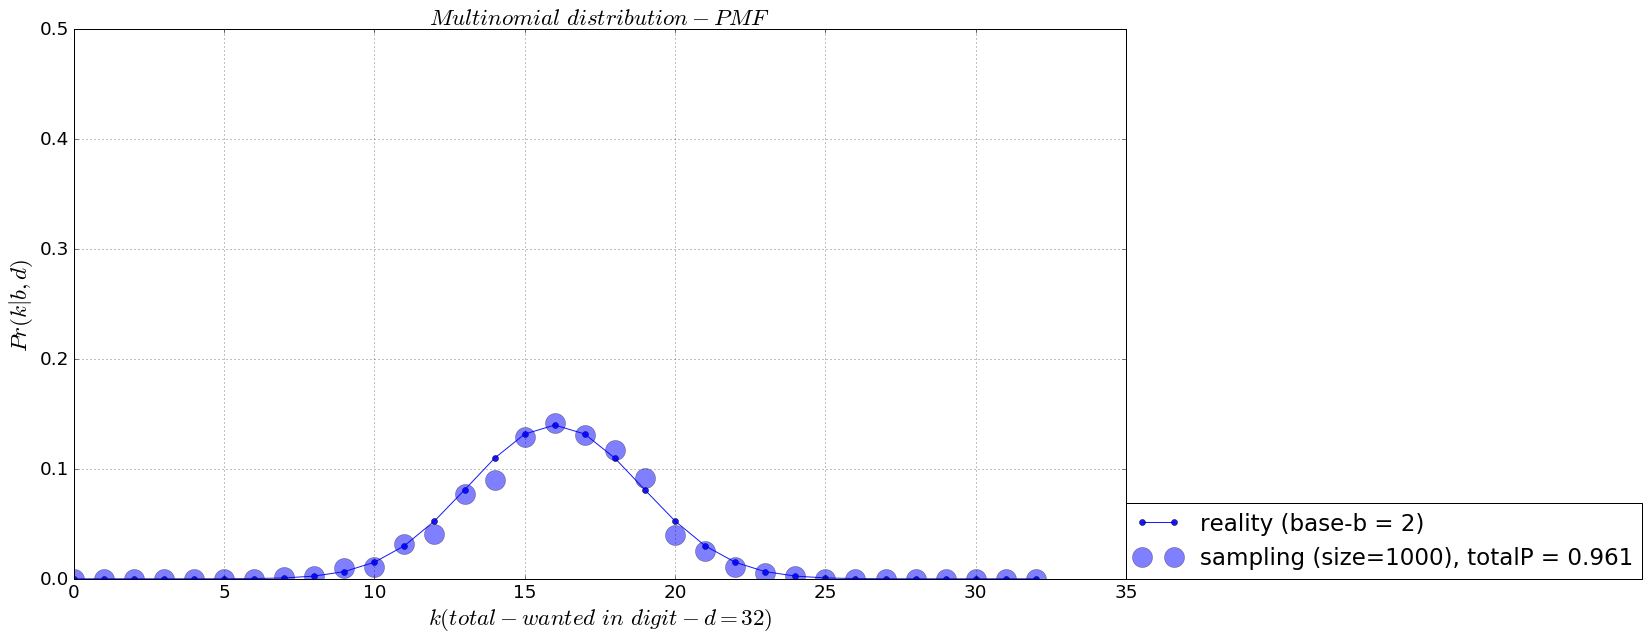

In [8]:
##########################################
xx_all = []
pp_all = []
xx_reality_all = []
pp_reality_all = []
base_list = np.array([2])
for bn in range(len(base_list)):
    aMD = multinomial_D(base = base_list[bn], digit = 32, total_sampling = 1000)
    samplingD = aMD.sampling_pmf()
    xx_all.append(samplingD[0])
    pp_all.append(samplingD[1])
    work_way_all_all = samplingD[2]
    ##
    realityD = aMD.reality_pmf()
    xx_reality_all.append(realityD[0])
    pp_reality_all.append(realityD[1])
    
### plotting
figure_name = '-sampling-reality-base{:}'.format(aMD.base)
file_suffix = '.png'
save_figure = os.path.join(saving_dir_path, file_name + figure_name + file_suffix)
numberingFig = numberingFig + 1
# plotting1
figure = plt.figure(numberingFig, figsize = (16, 9))
window1 = figure.add_subplot(1, 1, 1)
for i in range(len(base_list)):
    window1.plot(xx_reality_all[i], pp_reality_all[i], marker ='o', markersize = 6
           , color = AlvaColorCycle[i], alpha = 0.9, label = 'reality (base-b = {:})'.format(base_list[i]))
    window1.plot(xx_all[i], pp_all[i], marker = 'o', markersize = 20
                 , color = AlvaColorCycle[i], alpha = 0.5, linewidth = 0
                 , label = 'sampling (size={:}), totalP = {:1.3f}'.format(aMD.total_sampling, pp_all[i].sum()))
plt.ylim(0, 0.5)
plt.title(r'$ Multinomial \ distribution-PMF $'
          , fontsize = AlvaFontSize)
plt.xlabel(r'$ k (total-wanted \ in \ digit-d = {:}) $'.format(aMD.digit), fontsize = AlvaFontSize)
plt.ylabel(r'$ Pr(k|b, d) $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.8)
plt.yticks(fontsize = AlvaFontSize*0.8) 
plt.grid(True)
plt.legend(loc = (1, 0), fontsize = AlvaFontSize)
figure.tight_layout() 
plt.savefig(save_figure, dpi = 300, bbox_inches = 'tight')
plt.show()

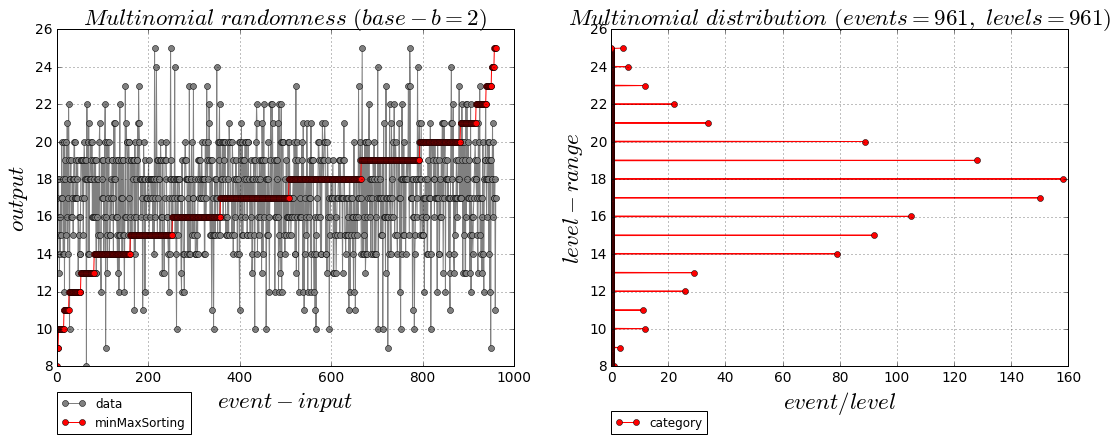

In [9]:
randomSeed = aMD.randomSeed_multinomial(work_way_all_all)
meanP = randomSeed.sum() / len(randomSeed)
total_event = len(randomSeed)
totalLevel = int(total_event/1)
category = alva.AlvaLevel(randomSeed, totalLevel, False)
gLevel = category[0]
numberLevel = category[1]

gInput = np.arange(total_event)


# plotting
figure_name = '-random_seed_base{:}'.format(aMD.base)
file_suffix = '.png'
save_figure = os.path.join(saving_dir_path, file_name + figure_name + file_suffix)

numberingFig = numberingFig + 1
figure = plt.figure(numberingFig, figsize = AlvaFigSize)
plot1 = figure.add_subplot(1, 2, 1)
plot1.plot(gInput, randomSeed, color = 'gray', marker = 'o', label = 'data')
plot1.plot(gInput, alva.AlvaMinMax(randomSeed), color = 'red', marker = 'o', label = 'minMaxSorting')
plot1.grid(True)
plt.title(r'$ Multinomial \ randomness \ (base-b = {:}) $'.format(aMD.base), fontsize = AlvaFontSize)
plt.xlabel(r'$ event-input $', fontsize = AlvaFontSize)
plt.ylabel(r'$ output $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 
plt.legend(loc = (0, -0.2))

plot2 = figure.add_subplot(1, 2, 2)
plot2.plot(numberLevel, gLevel, color = 'red', marker = 'o', label = 'category') 

plot2.grid(True)
plt.title(r'$ Multinomial \ distribution \ (events = {ev:},\ levels = {le:}) $'.format(ev = total_event, le = totalLevel)
          , fontsize = AlvaFontSize)
plt.xlabel(r'$ event/level $', fontsize = AlvaFontSize)
plt.ylabel(r'$ level-range $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 
plt.legend(loc = (0, -0.2))

figure.tight_layout()
plt.savefig(save_figure, dpi = 300)
plt.show()